In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# import statsmodels
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc



# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

## Loading data into the notebook :

In [59]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [60]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Basic EDA 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [63]:
df.isnull().sum(axis=0)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [64]:
df["bmi"] = df["bmi"].fillna(28.89)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

 # Descriptive Statistics :


In [65]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893110,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [66]:
df.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893110
stroke                   0.048728
dtype: float64

In [67]:
df.median()

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.400
stroke                   0.000
dtype: float64

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Female    141
Male      108
Name: gender, dtype: int64


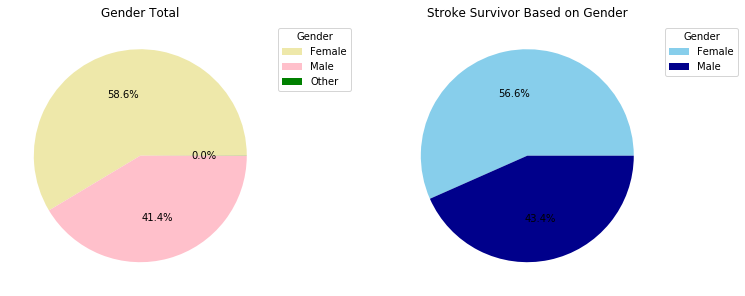

In [68]:
stroke_gen = df['gender'].value_counts()
stroke_gen_1 = df.loc[df['stroke'] == 1]
stroke_gen_1 = stroke_gen_1['gender'].value_counts()
print(stroke_gen)
print(stroke_gen_1)

fig, ax = plt.subplots(1,2,figsize=(12,7))
fig.tight_layout(pad=9)
colors = ["palegoldenrod","pink","green"]
ax[0].pie(stroke_gen, autopct='%1.1f%%', colors=colors)
ax[0].set_title('Gender Total')
ax[0].legend(['Female','Male','Other'],
          title='Gender',
          bbox_to_anchor=(1,1))

colors = ["skyblue","darkblue"]
ax[1].pie(stroke_gen_1, autopct='%1.1f%%', colors=colors)
ax[1].set_title('Stroke Survivor Based on Gender')
ax[1].legend(['Female','Male','Other'],
          title='Gender',
          bbox_to_anchor=(1,1))

# Normality check

##### H0:Older age people have more chances of getting stoke
##### H1: Older age people have less chances of getting stroke

In [69]:
#test of normality

n1=st.shapiro(df.bmi)
n2=st.shapiro(df.avg_glucose_level)
print(n1)
print(n2)

(0.9516714215278625, 4.2832949257809454e-38)
(0.8058695793151855, 0.0)


C:\Users\Subham\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


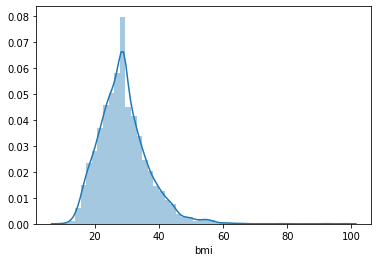

In [70]:
sns.distplot(df.bmi, kde=True)

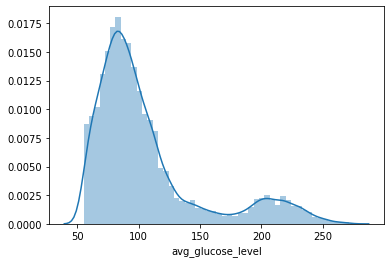

In [71]:
sns.distplot(df.avg_glucose_level, kde=True)

### As the continuous numerical variables failed the normality test, we perform the non parametric test.

# Non-parametric Test

# Chi2_square Contengency

##### H0 : there is no association b/w smoking and stroke
##### H1 : there is association b/w smoking and stroke

In [72]:
# Test of assiciation 
table=pd.crosstab(df['stroke'],df['smoking_status'])
table

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


In [73]:
s=len(df[df.smoking_status=='smokes'])/len(df.smoking_status)*100
s

15.44031311154599

In [74]:
chi2,p,dof,_=st.chi2_contingency(table)
print('chi:' ,chi2)
print('p :' ,p)
print('dof :', dof)

chi: 29.147269191399264
p : 2.0853997025008455e-06
dof : 3


###### Conclusion:

P-value=9.50424061123842e-06. Since P-Value is close to 0 and less than alpha (0.05) we Reject H0. There is no relation between smoker and Stroke

------

# Chi2_square Test


Q. The servay clames that chances of heart_disease is 50% among private ,20% among self-employes,
18% among Govt-jobs and 12% among children.Check the servay's claim using p-value criteria.
Consider a 5% level of significance.

##### H0: According to chances of heart_disease is 50% among private ,20% among self-employes,18% among Govt-jobs and 12% among children.
##### H1: The ratio of Worktype Dependency on HearDisease used is diffrent from the claimed Value.
##### alpha = 0.05

In [75]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [76]:
total=df['work_type'].value_counts().sum()
total

5110

In [77]:
hw=df[df['heart_disease']==1]['work_type']
hw.value_counts()

Private          158
Self-employed     81
Govt_job          36
children           1
Name: work_type, dtype: int64

In [78]:
chi_square_stat, p_value = st.chisquare(obs, f_exp=exp)
print("Chi-square stat:",chi_square_stat)
print("P-value:",p_value)

Chi-square stat: 49.8743961352657
P-value: 8.496717583725333e-11


###### Conclusion:
Here p-value is less than 0.05 thus we can reject the null hypothesis at 5% level of significance and conclude that the ratio of Work type Dependency on Heart Disease used is different from the claimed Value.
----

#  Mannwhitneyu test

#### H0: Average BMI is same IN RESIDENT TYPE.
#### H1: Average BMI is not same IN RESIDENT TYPE.

In [79]:
ub=df[df['Residence_type']=='Urban']['bmi']
rr=df[df['Residence_type']=='Rural']['bmi']


In [86]:
# Test of Normality 
stat,pu=st.shapiro(ub)
stat,pr=st.shapiro(rr)
print('Pvalue of Urban bmi: ',pu)
print('Pvalue of Urban bmi: ',pr)

Pvalue of Urban bmi:  2.2601703099293786e-24
Pvalue of Urban bmi:  1.280114758638692e-31


In [87]:
st.mannwhitneyu(ub,rr)

MannwhitneyuResult(statistic=3259836.0, pvalue=0.47477673713654733)

##### Conclusion:
As P-value is greater than alpha(0.05), we accept H0.

--------

# Kruskal test 

In [89]:
st.shapiro(df['avg_glucose_level'])

(0.8058695793151855, 0.0)

As the normality test failed we go for a non-parametric test i.e Kruskal test

##### H0 : sample mean rank of the smoking status related to Avg Glucose Level are same.
##### H1:  sample mean rank of the smoking status related to Avg Glucose Level are not the same.

In [24]:
sm=df[df['smoking_status']=='smokes']['avg_glucose_level']
ns=df[df['smoking_status']=='never smoked']['avg_glucose_level']
un=df[df['smoking_status']=='Unknown']['avg_glucose_level']

If we consider the unknown values:

In [25]:
st.kruskal(sm,un,ns)

KruskalResult(statistic=10.538598262295894, pvalue=0.005147216833078159)

###### Conclusion:
As the p value is less than alpha (0.05), Fail to accept H0.

-----------------------------

If we dont consider the unknown values:

In [26]:
st.kruskal(sm,ns)

KruskalResult(statistic=0.1897680565385988, pvalue=0.6631097321619027)

#### Conclusion:
As the p value is Greater than alpha (0.05), accept H0.

---------------------

# Central_limit_theorem

In [27]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()   
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='green')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()

series1 = df["age"]
series2 = df["bmi"]


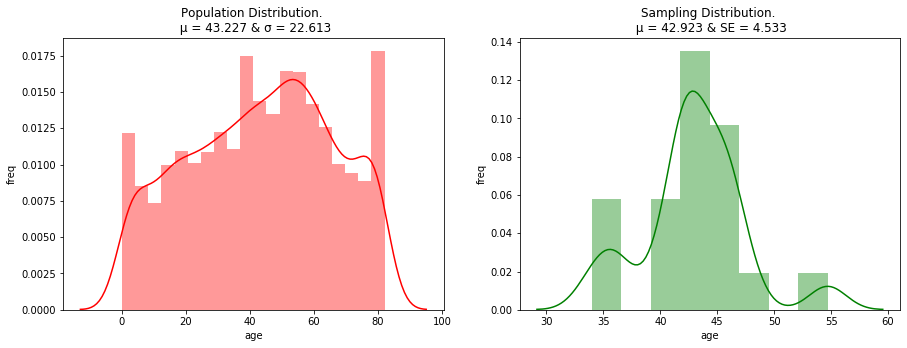

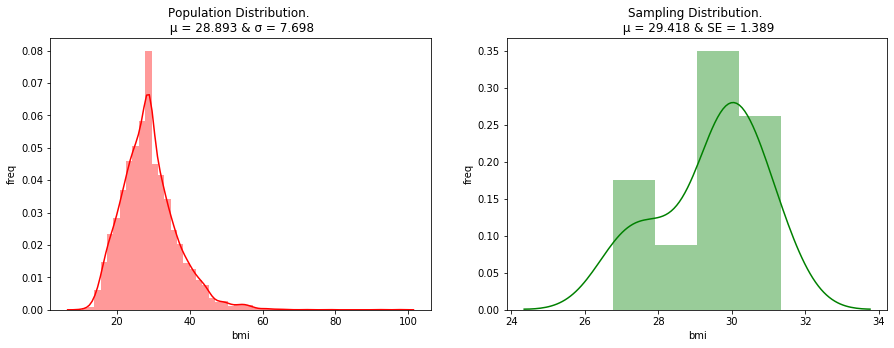

In [28]:
central_limit_theorem(series1,'age',n_samples = 20, sample_size = 20)
central_limit_theorem(series2,"bmi",n_samples =20, sample_size = 20)

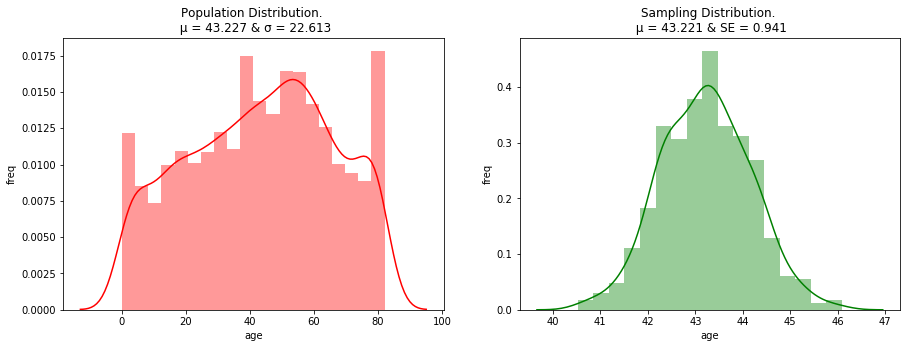

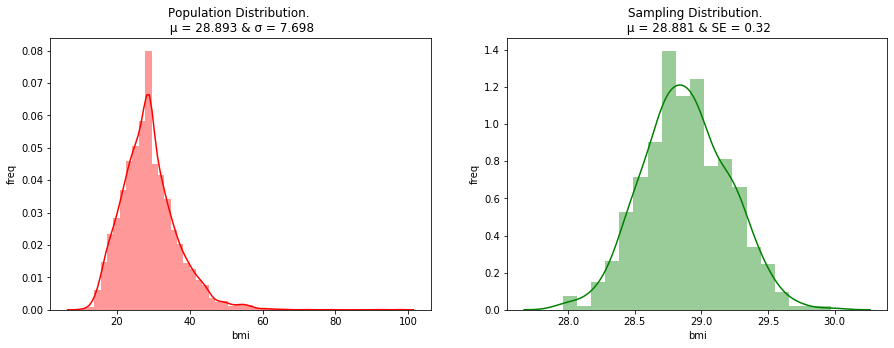

In [29]:
central_limit_theorem(series1,'age',n_samples = 500, sample_size = 500)
central_limit_theorem(series2,"bmi",n_samples = 500, sample_size = 500)